In [17]:
from prepare_module import X_y_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
# getting clean data
df = pd.read_csv('../data/Mayor_s_Action_Center_Service_Cases_Clean.csv', index_col=0)
target = 'is_less_than_one_week'

train, validate, test,\
     X_train,y_train,\
         X_validate, y_validate,\
              X_test, y_test = X_y_split(df, target=target, stratify=True)

## Part 1 Micro
1. **Univariate**
    1. Which keywords has the most cases?
        * Trash
    1. What are the most frequent reasons for the requests (the subcategories)?
        * Stolen
1. **Bivariate**
    1. What is the relationship between the type of request(subcategory) and the response time?
    1. What is the relationship between the open date and the response time?
    1. What is the relationship between the year it was creaetd and the response time?
    1. What is the relationship between the month it was created and the response time?
    1. What is the relationship between the week it was created and the response time?
    1. What is the relationship between the weekday it was created and the response time?
    1. What is the relationship between the zip code of the incident and the response time?

### Univariate

In [9]:
# getting the shape
print(df.shape)
df.head(1)

(772962, 12)


,keyword,subcategory,township,zip,council_district,origin,num_open_cases,year_created,month_created,week_created,weekday_created,is_less_than_one_week
0,Chuckhole,Street (Chuckhole),CENTER,46225,16,RequestIndy Online,0,2015,6,23,0,True


In [30]:
# What keyowrd has the most cases?
train.keyword.value_counts()

trash = train.loc[train['keyword'] == 'Trash']

trash.subcategory.value_counts()

subcategory
96 Gal Cart - Stolen         21543
96 Gal Cart - Other          18613
96 Gal Trash (Missed)        14547
96 Gal Trash (Block)         10747
Heavy                         8907
96 Gal Cart - Buy             5492
Complaint/Crew                4382
96 Gal Cart - New Request     2971
Freon                         1665
Recycling New Service         1664
Hand Collection (Missed)      1053
Leaves                         794
Hand Collection (Block)        586
Property Damage                161
Name: count, dtype: int64

### Bivariate

##### What is the relationship between the type of request(subcategory) and the response time?

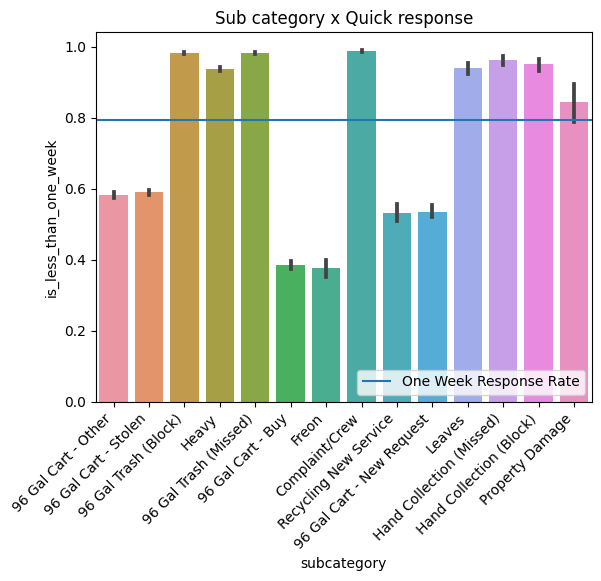

In [41]:
# getting target
# target = trash['is_less_than_one_week']

# getting stacked bar chart to show the relationships
plt.title('Sub category x Quick response')
sns.barplot(data=trash, x='subcategory', y=target)
one_week_response_rate = train[target].mean()
plt.axhline(one_week_response_rate, label='One Week Response Rate')
plt.xticks(rotation = 45, ha='right')
plt.legend(loc='lower right')
plt.show()

##### Takeaways:
* There seems to be a clear difference between each subcategory and the response rate

##### Actions:
* Run a chi2 hypothesis test to see

##### What is the relationship between the open date and the response time?


##### What is the relationship between the year it was creaetd and the response time?


##### What is the relationship between the month it was created and the response time?


##### What is the relationship between the week it was created and the response time?


##### What is the relationship between the weekday it was created and the response time?


##### What is the relationship between the zip code of the incident and the response time?

## Part 2 - Micro
1. **Multivariate**
    1. TBD

# Functions